# Optimization

From our previous lecture, recall that a neural network is a function that maps inputs to outputs based on parameters.

In a regression task, we have access to a dataset composed of pairs of inputs and outputs.

In [1]:
# Data matrix: each row describes a property by its number of bedrooms, number of bathrooms, distance to the closest station, and parking availability. Each row is called an observation.
X = [[2, 1, 0.5, 0],
     [4, 2, 2.0, 1],
     [3, 1, 1.0, 0]]

# Target matrix: each row describes the monthly rent for each of the properties above. Each row is called a target.
Y = [[1550],
     [3100],
     [2200]]


For a given vector of parameters $\mathbf{w}$, the prediction computed by a neural network for an observation $\mathbf{x}$ can be denoted by $f(\mathbf{x}; \mathbf{w})$

In [2]:
# A very simple "neural network"
def f(x, w):
    return w[0]*x[0] + w[1]*x[1] + w[2]*x[2] + w[3]*x[3]

# Guessing the parameters and checking their predictions
w = [500, 200, -100, 100]

for i in range(len(X)):
    print(f(X[i], w))

1150.0
2300.0
1600.0


In a regression task, the goal is to find parameters that allow predicting the target associated to a new observation (generalizing).

In this particular example, it is appropriate to look for a parameter vector $\mathbf{w}$ that minimizes a so-called loss function, which measures how far the predictions are from the targets in the given dataset.

In [3]:
def loss(X, Y, w): # Mean squared error
    l = 0
    for i in range(len(X)):
        prediction = f(X[i], w)
        l += (prediction - Y[i][0])**2
    return l / len(X)

# Guessing the parameters and checking their loss. Which parameter vector performs best?
print(loss(X, Y, [500, 150, -50, 200]))
print(loss(X, Y, [700, 200, -100, 100]))
print(loss(X, Y, [600, 100, -50, 150]))

343541.6666666667
0.0
133541.66666666666


Optimization is the process of finding parameters that minimize a loss function (or maximize a gain function). In order to understand efficient optimization methods, we will need calculus.

# Functions

* Recall that a function $f: \mathbb{R}^d \to \mathbb{R}$ maps a $d$-dimensional vector to a real number.
* For example, consider the function $f : \mathbb{R}^8 \to \mathbb{R}$ given by
$$ f(x_0, x_1, x_2, x_3, w_0, w_1, w_2, w_3) =  w_0 x_0 + w_1x_1 +  w_2x_2 +  w_3x_3, $$
* The function $f$ defined above has $8$ input variables and $1$ output variable, and $f(\mathbb{x}, \mathbf{w})$ is the dot product between the $4$-dimensional vectors $\mathbf{x}$ and $\mathbf{w}$ given by $\mathbf{x}^T = [x_0, x_1, x_2, x_3]$ and $\mathbf{w}^T = [w_0, w_1, w_2, w_3]$.
* In Python, we could implement $f$ as follows:

In [4]:
def f(x, w):
    return w[0]*x[0] + w[1]*x[1] + w[2]*x[2] + w[3]*x[3]

* As another example, consider the function $f: \mathbb{R} \to \mathbb{R}$ given by $f(x) = 3x^2 - 4x$
* Using `matplotlib`, we can plot this function as follows.

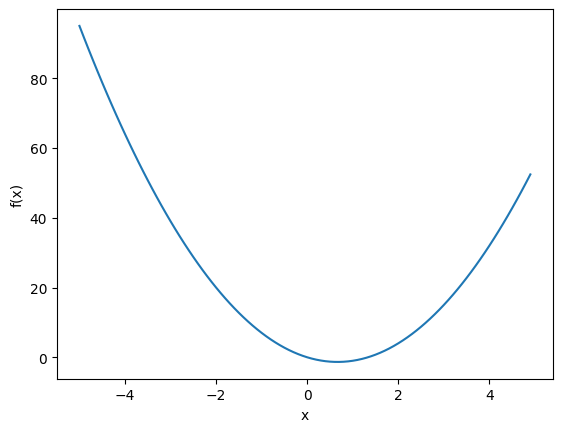

In [5]:
import torch
from matplotlib import pyplot as plt
%matplotlib inline

def f(x):
    return 3 * (x ** 2) - 4 * x

x = torch.arange(-5, 5, 0.1) # Creates an array of numbers in the range [-5, 5), spaced 0.1 units apart
y = f(x) # Applies the function `f` elementwise to the (tensor) array `x`
plt.plot(x, y);
plt.xlabel('x');
plt.ylabel('f(x)');

# Limits

* Consider a function $f: B \to \mathbb{R}$, where $B \subseteq \mathbb{R}$ is a set of real numbers.

* Recall that the following denotes that the limit of $f$ when $x$ tends to $a$ is equal to $L$: $$ \lim_{x \to a} f(x) = L, $$

which intuitively means that $f(x)$ can be made arbitrarily close to $L$ by making $x$ sufficiently close to $a$.

* A function $f : \mathbb{R} \to \mathbb{R}$ is continuous if $\lim_{x \to a} f(x) = f(a)$ for every $a \in \mathbb{R}$.

* However, $\lim_{x \to a} f(x)$ may exist even if $f(a)$ is undefined.

# Derivatives and Differentiation

* The derivative $f'$ of a function $f: \mathbb{R} \to \mathbb{R}$ is a function given by

$$ f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} $$
for every $x \in \mathbb{R}$ such that the limit on the right side exists.

* The function $f$ is differentiable at $x$ if $f'(x)$ is defined.

* Note that $\frac{f(x + h) - f(x)}{h}$ is not defined when $h = 0$, which explains the need for limits.

* The derivative $f'(a)$ at point $a$ is the *instantaneous* rate of change of $f$ at point $a$.

* The derivative $f'(a)$ at point $a$ is the *slope* of a line that is tangent to the graph of $f$ at $a$




## Example

* Consider again the function $f$ given by $f(x) = 3x^2-4x$.
* The following cell computes $\frac{f(x + h) - f(x)}{h}$ for $x=1$ and progressively smaller $h$.
* The evidence suggests that $f'(1) = 2$.

In [6]:
def f(x):
    return 3 * (x ** 2) - 4 * x

def numerical_derivative(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, approximation:{numerical_derivative(f, 1, h):.5f}')
    h = h / 10

h=0.10000, approximation:2.30000
h=0.01000, approximation:2.03000
h=0.00100, approximation:2.00300
h=0.00010, approximation:2.00030
h=0.00001, approximation:2.00003


* In fact, the derivative $f'$ of $f$ is given by $f'(x) = 6x-4$, so that $f'(1) = 6\times 1 - 4 = 2$.


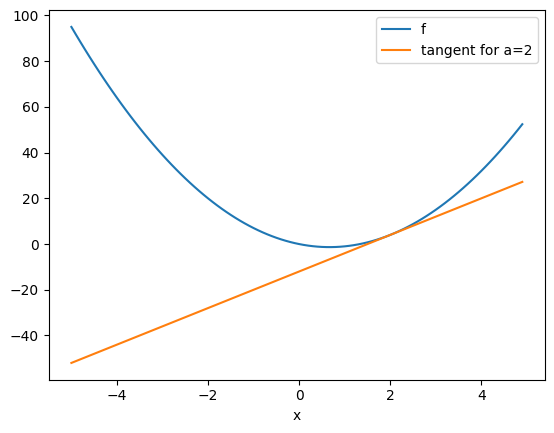

In [7]:
def f(x):
    return 3 * (x ** 2) - 4 * x

def f_prime(x):
    return 6 * x - 4

def tangent(x, a):
    b = f(a) - f_prime(a)*a # Constant with respect to `x`
    return f_prime(a)*x + b # f'(a) is the slope of a line tangent to the graph of $f$ at point a

a = 2 # Change `a` to other values the range [5, -5) and watch the results
x = torch.arange(-5, 5, 0.1) # Creates an array of numbers in the range, spaced 0.1 units apart
plt.plot(x, f(x), label='f');
plt.plot(x, tangent(x, a), label=f'tangent for a={a}')
plt.xlabel('x');
plt.legend(loc='best')
plt.show()

* A trigonometric example:

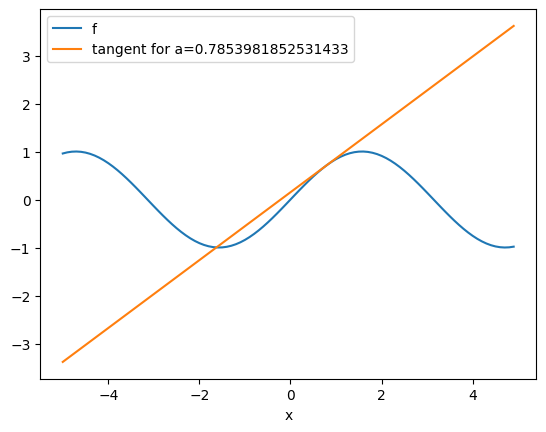

In [8]:
def f(x):
    return torch.sin(x)

def f_prime(x): # The derivative of the sine function is the cosine function
    return torch.cos(x)

def tangent(x, a):
    b = f(a) - f_prime(a)*a # Constant with respect to `x`
    return f_prime(a)*x + b # f'(a) is the slope of a line tangent to the graph of $f$ at point a

a = torch.tensor(torch.pi/4) # Change `a` to other values the range [5, -5) and watch the results
x = torch.arange(-5, 5, 0.1) # Creates an array of numbers in the range, spaced 0.1 units apart
plt.plot(x, f(x), label='f');
plt.plot(x, tangent(x, a), label=f'tangent for a={a}')
plt.xlabel('x');
plt.legend(loc='best')
plt.show()

## Differentiation rules

* Consider a function $f: \mathbb{R} \to \mathbb{R}$ and let $y = f(x)$ for every $x \in \mathbb{R}$, so that changing the value of $x$ changes the value of $y$.

* In alternative  notation, if $f$ is differentiable at $x$, we may write
$$ \frac{dy}{dx} = \frac{d}{dx} y   = f'(x). $$

* Let $c \in \mathbb{R}$ and $n \in \mathbb{R}$ be constants, and let $e$ denote Euler's number. It can be shown that:
    * $\frac{d}{dx} \left( c \right)  = 0$.
    * $\frac{d}{dx} \left( x^n \right) = n x^{n - 1}$.
    * $\frac{d}{dx} \left( e^x \right) = e^x$.
    * $\frac{d}{dx} \left( \ln(x) \right) = \frac{1}{x}$.
    
* Suppose that $f: \mathbb{R} \to \mathbb{R}$ and $g: \mathbb{R} \to \mathbb{R}$ are functions that are differentiable at every $x \in \mathbb{R}$. If $c \in \mathbb{R}$ is a constant, the following rules apply:
    * Constant multiple rule:
    
    $$\frac{d}{dx} [cf(x)] = c \frac{d}{dx} f(x).$$
    
    * Sum rule:

    $$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x).$$

    * Product rule:

    $$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)].$$

    * Quotient rule:

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$

* Exercise: use these rules to find the derivative of the function $f$ given by $f(x) = 3x^2-4x$.

## Partial Derivatives

* In deep learning, functions typically take *many* variables. Therefore, we will need to differentiate *multivariate* functions.

* Consider a function $f: \mathbb{R}^n \to \mathbb{R}$ and let $y = f(x_1, x_2, \ldots, x_n)$ for every vector $\mathbf{x}^T = [x_1, x_2, \ldots, x_n]$, so that changing the value of the vector $\mathbf{x}$ changes the value of $y$.

* The function $f$ takes the $n$ variables $x_1, x_2, \ldots, x_n$ and maps them to a single variable $y$.

* The partial derivative of $f$ with respect its $i$-th argument at point $[x_1, x_2, \ldots, x_n]^T$ is given by
$$ \frac{\partial }{\partial x_i}f(x_1, x_2, \ldots, x_n) = \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}$$
when the limit on the right exists.

* In other words, we treat $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ as constants and calculate the derivative of $y$ at point $x_i$.

## Gradients

* Consider a function $f: \mathbb{R}^n \to \mathbb{R}$ that is differentiable at $\mathbf{x} \in \mathbb{R}^n$

* The gradient vector $\nabla_{\mathbf{x}} f(\mathbf{x})$ of $f$ at $\mathbf{x}$ is a vector that contains the partial derivatives of $f$ at point $\mathbf{x}$ with respect to each of its arguments:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^T,$$
assuming that each of the partial derivatives is defined.

* When there is no ambiguity regarding which arguments should have a corresponding partial derivative in the gradient vector, we may write $\nabla f(\mathbf{x})$.



## Chain Rule

* Consider a function $f: \mathbb{R} \to \mathbb{R}$ and a function $g: \mathbb{R} \to \mathbb{R}$. The function $h : \mathbb{R} \to \mathbb{R}$ given by $h(x) = f(g(x))$ is called the composition of $f$ and $g$.


* The *chain rule* enables computing (partial) derivatives of composite functions, which is an extremely important task in deep learning.

* First, consider the (differentiable) functions $f: \mathbb{R} \to \mathbb{R}$ and $g : \mathbb{R} \to \mathbb{R}$. Let $y =f(u)$ and $u = g(x)$, so that changing the value of $u$ changes the value of $y$ and changing the value of $x$ changes the value of $u$. In that case, if changing the value of $x$ only affects the value of $y$ through changes in the value of $u$, then
$$ \frac{d}{dx}f(g(x)) = \frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx} = \frac{d}{du} f(u) \frac{d}{dx} g(x).$$

* Second, consider the (differentiable) functions $f: \mathbb{R}^m \to \mathbb{R}$ and $g_i : \mathbb{R}^n \to \mathbb{R}$, where $i \in \{1, \ldots, m \}$. Let $y = f(u_1, \ldots, u_m)$ and $u_i = g_i(x_1, \ldots, x_n)$, so that changing the value of $[x_1, \ldots, x_n]^T$ changes the value of $u_i$ and changing the value of $u_i$ changes the value of $y$, for every $i$. If changes in $x_i$ only affect $y$ through changes in some of the $u_j$, and if changes in $x_i$ do not affect $x_k$ for $i \neq k$, then
$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2} \frac{\partial u_2}{\partial x_i} + \cdots + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i}$$
for every $i \in \{1, \ldots, n \}$.

# Automatic Differentiation

* Computing partial derivatives is a crucial step for every optimization algorithm widely used in deep learning.

* Because neural networks often have many parameters (typically at least thousands, and possibly billions or more) that interact in complicated ways, computing derivatives manually is not feasible.

* Deep learning frameworks (such as `PyTorch`) are capable of *automatic differentiation*.

* These frameworks build a *computational graph* that is able to track how variables are combined to produce other variables, which then enables computing desired (partial) derivatives (and gradients).

* *Backpropagation* is the name of the algorithm used to compute partial derivatives (gradients) using the chain rule in an efficient way.





## First example

* Consider again the function $f$ given by $f(x) = 3x^2-4x$, and let $y = f(x)$ for every $x \in \mathbb{R}$.
* The code below shows how to compute $f'(1)$.

In [9]:
import torch

x = torch.tensor(1.0) # Creates a rank-0 tensor (number)
x.requires_grad_(True) # Records operations on this tensor for the purposes of computing gradients
print(x)
print(x.grad) # No gradients with respect to `x` have been computed yet
y = 3 * (x ** 2) - 4 * x # Defines a tensor `y` that depends on `x`
print(y)
y.backward() # Uses backpropagation to compute the gradient of `y` with respect to every tensor on which it depends
print(x.grad) # The result is stored inside the variable `grad` of each tensor on which `y` depends

tensor(1., requires_grad=True)
None
tensor(-1., grad_fn=<SubBackward0>)
tensor(2.)


* Note that PyTorch does not provide an equation that allows computing $f'$ in general, such as $f'(x) = 6x - 4$. That would require *symbolic* rather than *automatic* differentiation, which involves completely different techniques.


## Second example

* Consider the function $f : \mathbb{R}^4 \to \mathbb{R}$ given by $f(\mathbf{x}) = 2 \mathbf{x}^T \mathbf{x}$, and let $y = f(\mathbf{x})$ for every $x \in \mathbb{R}^4$.

* The code below shows how to compute $\nabla f([0, 1, 2, 3]^T)$.



In [10]:
import torch

x = torch.arange(4.0) # Creates a rank-1 tensor (vector)
x.requires_grad_(True) # Records operations on this tensor for the purposes of computing gradients
print(x)
print(x.grad) # No gradients with respect to `x` have been computed yet
y = 2 * torch.dot(x, x) # Defines a tensor `y` that depends on `x`
print(y)
y.backward() # Uses backpropagation to compute the gradient of `y` with respect to every tensor on which it depends
print(x.grad) # The result is stored inside the variable `grad` of each tensor on which `y` depends

tensor([0., 1., 2., 3.], requires_grad=True)
None
tensor(28., grad_fn=<MulBackward0>)
tensor([ 0.,  4.,  8., 12.])


* If $\mathbf{x} = [x_1, x_2, x_3, x_4]^T$, then $y = 2x_1^2 + 2x_2^2 + 2x_3^2 + 2x_4^2$. Therefore, for every $i \in \{1, 2, 3, 4\}$,
$$ \frac{\partial y}{\partial x_i} = 4x_i, $$
which also implies that $\nabla y = 4 \mathbf{x}$.
* Exercise: check that the code above computes the gradient correctly for different values of `x`.

* The code below shows how to compute $\nabla z$, where $z = x_1 + x_2 + x_3 + x_4$.


In [11]:
z = torch.sum(x) # Defines a tensor `z` that depends on `x`

print(x.grad) # The previous gradient computed by calling `backward` is still stored in the variable `grad`
x.grad.zero_() # Resets the gradient to zero
print(x.grad)

z.backward() # Uses backpropagation to compute the gradient of `z` with respect to every tensor on which it depends
print(x.grad) # The result is stored inside the variable `grad` of each tensor on which `z` depends

tensor([ 0.,  4.,  8., 12.])
tensor([0., 0., 0., 0.])
tensor([1., 1., 1., 1.])


* By default, **PyTorch accumulates (sums) gradients across calls to `backward`**. If we did not call `x.grad.zero_` in the previous example, we would obtain an undesired result.

## Detaching Computation

* It is sometimes necessary to compute the gradient of a variable `z` with respect to a tensor `x` while treating a tensor `y` as a constant.

* For example, suppose that $z = g(x, y)$ and $y = f(x)$ for every $x \in \mathbb{R}$ and some functions $g: \mathbb{R}^2 \to \mathbb{R}$ and $f : \mathbb{R} \to \mathbb{R}$. In that case, changing `x` affects $z$ directly and indirectly (through `y`).

* The following example shows how to treat the tensor `y` as a constant when computing the gradient of `z` with respect to `x`, effectively ignoring the indirect effect of `x` on `z`.

In [12]:
x = torch.tensor(1.0) # Creates a rank-0 tensor (number)
x.requires_grad_(True) # Records operations on this tensor for the purposes of computing gradients
print(x)
print(x.grad) # No gradients with respect to `x` have been computed yet

y = x * x # `y` depends on `x`
# z = y + x # In this case, z = y + x, and `y` is treated as a variable that depends on `x`
z = y.detach() + x # In this case, z = y + x, but `y` is treated as if it did not depend on `x`

z.backward() # Uses backpropagation to compute the gradient of `z` with respect to every tensor on which it depends
print(x.grad)


tensor(1., requires_grad=True)
None
tensor(1.)


Exercise: check the results above using the differentiation rules discussed earlier.

## Disabling automatic differentiation


* When performing computations that do not require gradients, disabling automatic differentiation will save time and memory
* The following example shows how to do this.

In [13]:
x = torch.arange(4.0) # Creates a rank-1 tensor (vector)
x.requires_grad_(True) # Records operations on this tensor for the purposes of computing gradients
print(x)

with torch.no_grad():
    y = 2 * torch.dot(x, x)

z = 2 * torch.dot(x, x)

print(y)
print(z)

# y.backward() # error, `y` does not require gradients
z.backward()
print(x.grad)

tensor([0., 1., 2., 3.], requires_grad=True)
tensor(28.)
tensor(28., grad_fn=<MulBackward0>)
tensor([ 0.,  4.,  8., 12.])


## House prices example

In [14]:
# Data matrix: each row describes a property by its number of bedrooms, number of bathrooms, distance to the closest station, and parking availability. Each row is called an observation.
X = [[2, 1, 0.5, 0],
     [4, 2, 2.0, 1],
     [3, 1, 1.0, 0]]
X = torch.tensor(X)

# Target vector: each element describes the monthly rent for each of the properties above. Each element is called a target.
y = [1550, 3100, 2200]
y = torch.tensor(y)

# A very simple "neural network"
def f(X, w):
    return torch.mv(X, w)

w = torch.tensor([500., 200., -100., 100.]) # Guessing the parameters
print(f(X, w)) # Checking its predictions

def loss(X, y, w):
    return ((f(X, w) - y)**2).mean()

# Which parameter vector performs best?
print(loss(X, y, torch.tensor([500., 150., -50., 200.])))
print(loss(X, y, torch.tensor([700., 200., -100., 100.])))
print(loss(X, y, torch.tensor([600., 100., -50., 150.])))

tensor([1150., 2300., 1600.])
tensor(343541.6562)
tensor(0.)
tensor(133541.6719)


* Computing the gradient of the loss with respect to parameters

In [15]:
w = torch.tensor([500., 200., -100., 100.]) # Initializes the parameters
# w = torch.tensor([700., 200., -100., 100.]) # Initializes the parameters
w.requires_grad_(True) # Records operations using these parameters for the purposes of computing gradients
print(w)

l = loss(X, y, w)
l.backward()
print(w.grad) # The i-th element of this gradient indicates whether small increases to the i-th parameter increase or decrease the loss

tensor([ 500.,  200., -100.,  100.], requires_grad=True)
tensor([-3866.6670, -1733.3335, -1600.0001,  -533.3334])


# Recommended reading

* [Dive into Deep Learning](https://d2l.ai): Chapters 2.4 and 2.5.

# [Storing this notebook as a `pdf`]

In [16]:
%%capture
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# Set the path to this notebook below (add \ before spaces). The output `pdf` will be stored in the corresponding folder.
!jupyter nbconvert --to pdf /content/gdrive/My\ Drive/Colab\ Notebooks/nndl/week_02/lecture/Automatic_Differentiation.ipynb

# If having issues, save this notebook (File > Save) and restart the session (Runtime > Restart session) before running this cell. To debug, remove the first line (`%%capture`).